In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler,StandardScaler

In [4]:
train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')

In [8]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature Cleaning

In [4]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

## Feature Extraction and Creation

In [5]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_df['CabinLevel'] = train_df['Cabin'].str[0]
test_df['CabinLevel'] = test_df['Cabin'].str[0]

bins = [0, 18, 35, 50, 100]  # Define age bins
labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Labels for the bins
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

# family size
train_df['FamilySize']=train_df['SibSp']+train_df['Parch']+1
test_df['FamilySize']=test_df['SibSp']+test_df['Parch']+1



## Categorical Feature Encoding

In [6]:
categorical_features=['Sex','Embarked','AgeGroup','Title','CabinLevel']
encoded_df=pd.get_dummies(test_df[categorical_features]).astype(int)
test_df=test_df.join(encoded_df)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Mrs,Title_Ms,Title_Rev,CabinLevel_A,CabinLevel_B,CabinLevel_C,CabinLevel_D,CabinLevel_E,CabinLevel_F,CabinLevel_G
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,0,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,0,0,0,0,0,1,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,0


In [7]:
categorical_features=['Sex','Embarked','AgeGroup','Title','CabinLevel']
encoded_df=pd.get_dummies(train_df[categorical_features]).astype(int)
train_df=train_df.join(encoded_df)
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Rev,Title_Sir,CabinLevel_A,CabinLevel_B,CabinLevel_C,CabinLevel_D,CabinLevel_E,CabinLevel_F,CabinLevel_G,CabinLevel_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,1,0,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,0,1,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,1,0,0,0,0,0


In [8]:
train_df['Pclass_Sex_female'] = train_df['Pclass'] * train_df['Sex_female']
test_df['Pclass_Sex_female'] = test_df['Pclass'] * test_df['Sex_female']

train_df['Pclass_Age'] = train_df['Pclass'] * train_df['Age']
test_df['Pclass_Age'] = test_df['Pclass'] * test_df['Age']

train_df['Pclass_FamilySize'] = train_df['Pclass'] * train_df['FamilySize']
test_df['Pclass_FamilySize'] = test_df['Pclass'] * test_df['FamilySize']

train_df['Sex_female_Age'] = train_df['Sex_female'] * train_df['Age']
test_df['Sex_female_Age'] = test_df['Sex_female'] * test_df['Age']

train_df['Sex_female_FamilySize'] = train_df['Sex_female'] * train_df['FamilySize']
test_df['Sex_female_FamilySize'] = test_df['Sex_female'] * test_df['FamilySize']

train_df['Pclass_Title_Miss'] = train_df['Pclass'] * train_df['Title_Miss']
test_df['Pclass_Title_Miss'] = test_df['Pclass'] * test_df['Title_Miss']

In [9]:
id_features=['PassengerId','Name','Ticket','Cabin']
numerical_features=['Fare','Age','SibSp','Parch','FamilySize']
target_feature='Survived'

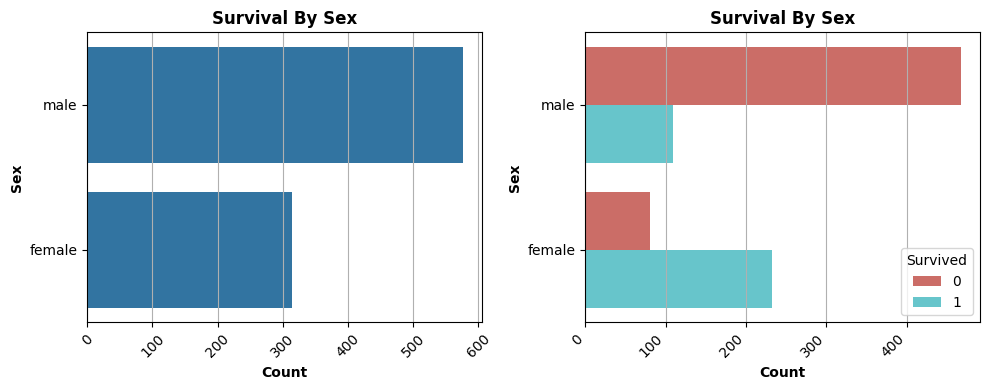

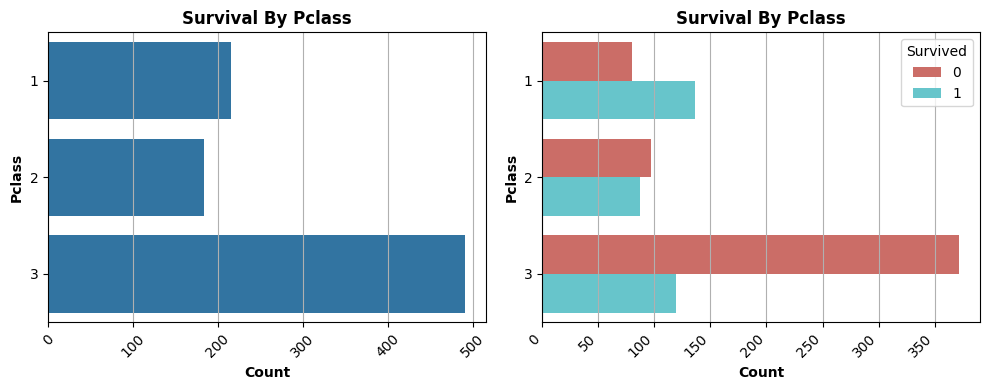

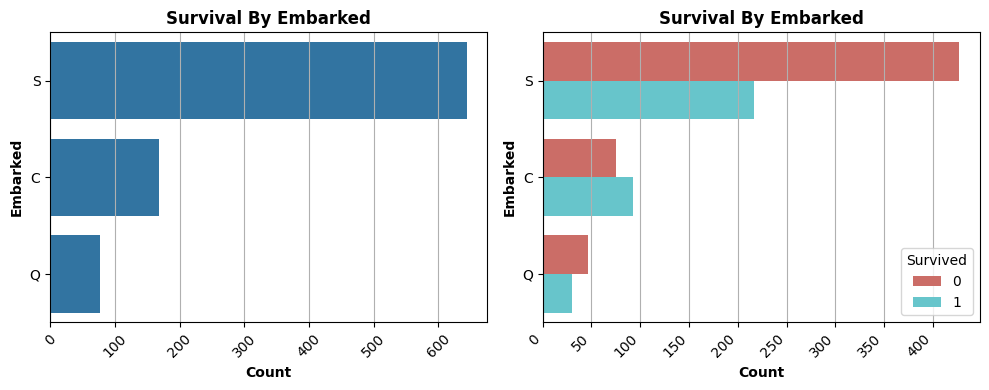

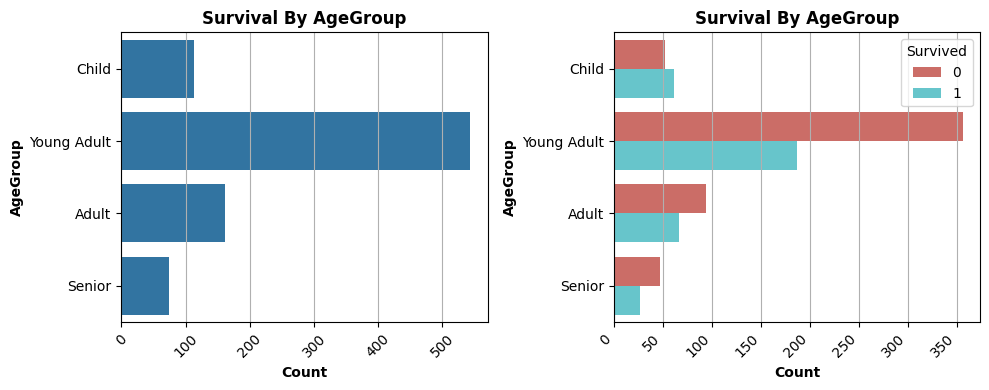

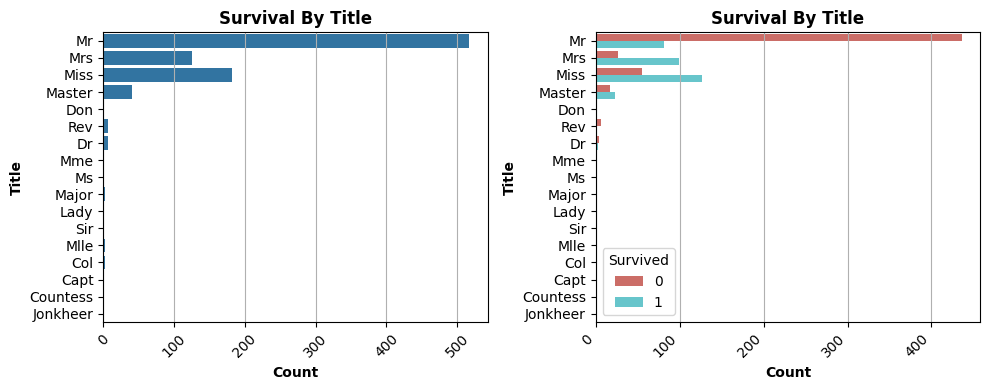

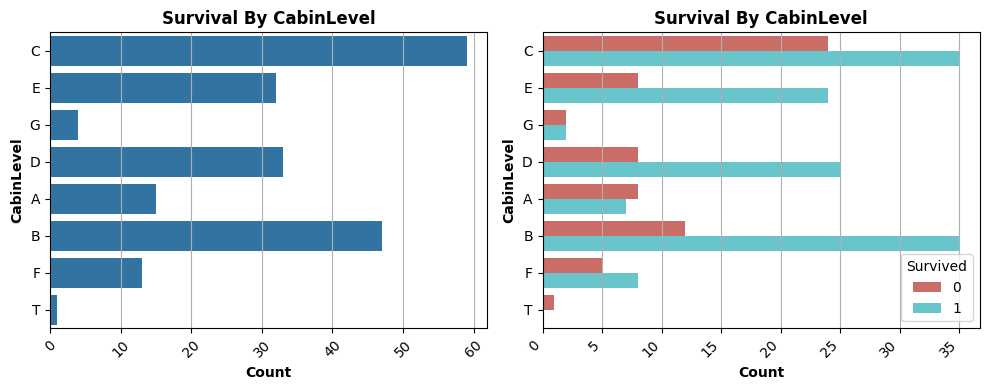

In [10]:
def plot_category(df,category,target):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    
    cmap = sns.color_palette("hls", 2)
    
    # Main bar plot
    sns.countplot(data=df, y=category, ax=axs[0])
    axs[0].set_title(f'Survival By {category}', weight='bold')
    axs[0].grid(axis='x')
    axs[0].set_ylabel(category, weight='bold')
    axs[0].set_xlabel('Count', weight='bold')

    # Bar plot with hue
    sns.countplot(data=df, y=category, hue=target,  ax=axs[1], palette=cmap)
    axs[1].set_title(f'Survival By {category}', weight='bold')
    axs[1].grid(axis='x')
    axs[1].set_ylabel(category, weight='bold')
    axs[1].set_xlabel('Count', weight='bold')
    
    # Rotate labels
    for i in [0, 1]:
        for label in axs[i].get_xticklabels():
            label.set_rotation(45)

        # for p in axs[i].patches:
        #     axs[i].annotate(f'{p.get_width()}', (p.get_x() + p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
        #                     ha='center', va='center')

    
    fig.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
plot_category(train_df,"Sex","Survived")
plot_category(train_df,"Pclass","Survived")
plot_category(train_df,"Embarked","Survived")
plot_category(train_df,"AgeGroup","Survived")
plot_category(train_df,"Title","Survived")
plot_category(train_df,"CabinLevel","Survived")

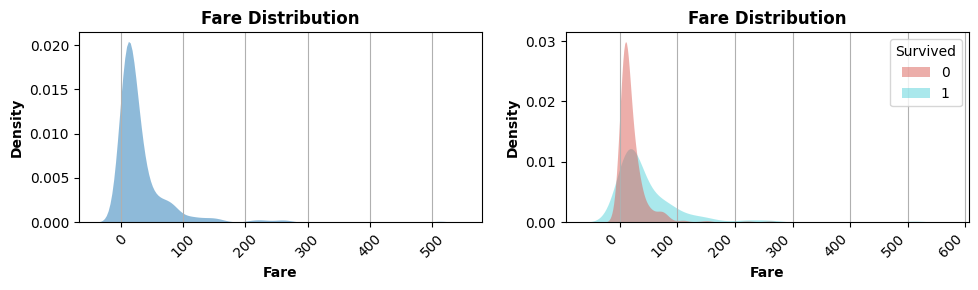

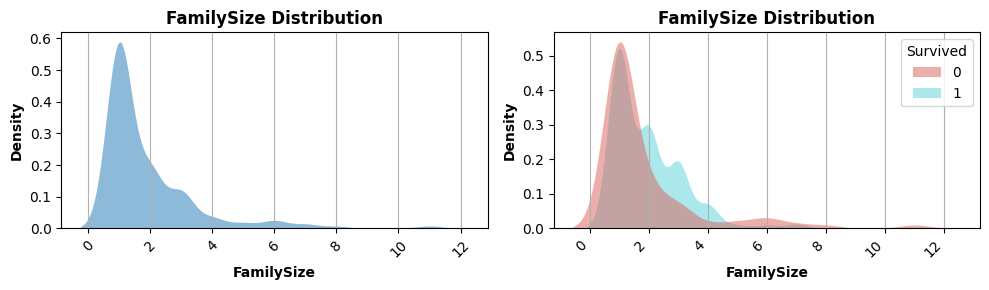

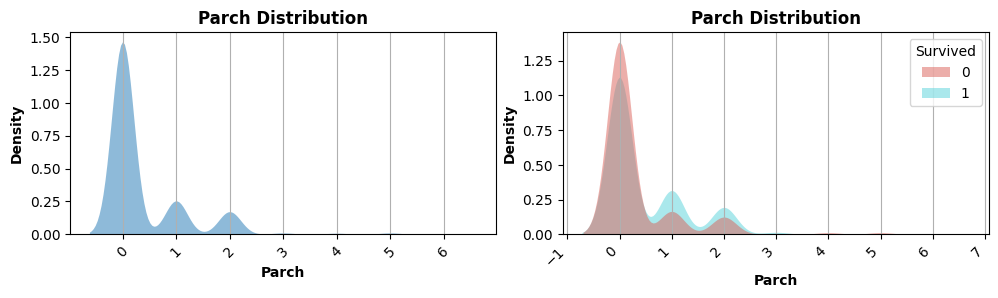

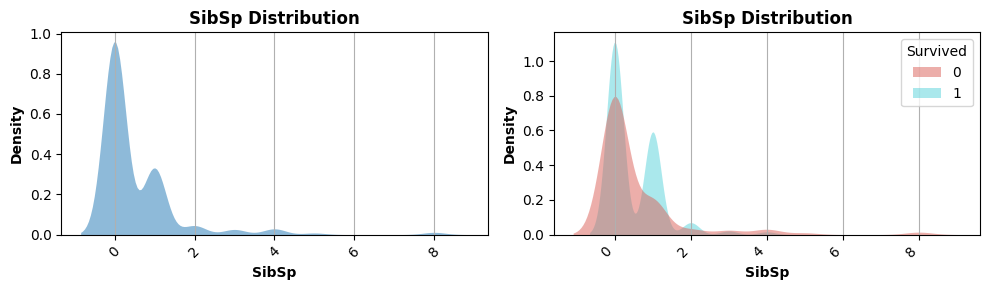

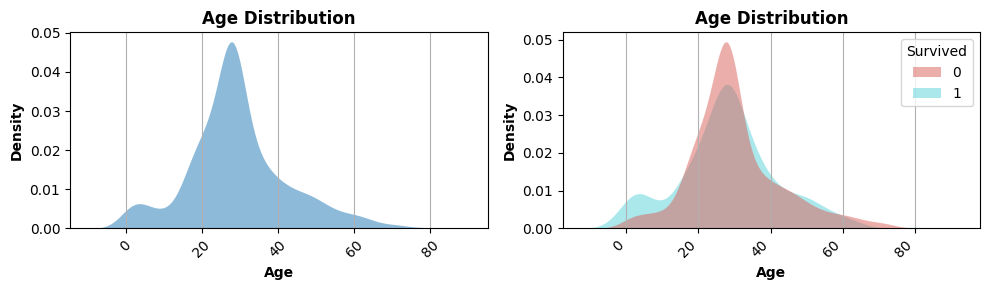

In [11]:
import mplcursors
def plot_kdes(df, main_feat, hue_feat):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))   
    cmap = sns.color_palette("hls", 2)
    
    sns.kdeplot(data=df, x=main_feat, fill=True, common_norm=False, alpha=.5, linewidth=0, ax=axs[0])
    axs[0].set_title(f'{main_feat} Distribution', weight='bold')
    axs[0].set_xlabel(main_feat, weight='bold')
    axs[0].set_ylabel('Density', weight='bold')   
    axs[0].grid(axis='x')

    
    sns.kdeplot(data=df, x=main_feat, hue=hue_feat, fill=True, common_norm=False, palette=cmap, alpha=.5, linewidth=0, ax=axs[1])
    axs[1].set_title(f'{main_feat} Distribution', weight='bold')
    axs[1].set_xlabel(main_feat, weight='bold')
    axs[1].set_ylabel('Density', weight='bold')
    axs[1].grid(axis='x')

    
    # Rotate labels
    for i in [0, 1]:
        for label in axs[i].get_xticklabels():
            label.set_rotation(45)
        mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f'Count: {len(sel.target.index)}'))

        

    fig.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
plot_kdes(train_df, 'Fare', 'Survived')
plot_kdes(train_df, 'FamilySize', 'Survived')
plot_kdes(train_df, 'Parch', 'Survived')
plot_kdes(train_df, 'SibSp', 'Survived')
plot_kdes(train_df, 'Age', 'Survived')

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            418 non-null    int64   
 1   Pclass                 418 non-null    int64   
 2   Name                   418 non-null    object  
 3   Sex                    418 non-null    object  
 4   Age                    418 non-null    float64 
 5   SibSp                  418 non-null    int64   
 6   Parch                  418 non-null    int64   
 7   Ticket                 418 non-null    object  
 8   Fare                   418 non-null    float64 
 9   Cabin                  91 non-null     object  
 10  Embarked               418 non-null    object  
 11  Title                  418 non-null    object  
 12  CabinLevel             91 non-null     object  
 13  AgeGroup               418 non-null    category
 14  FamilySize             418 non-null    int

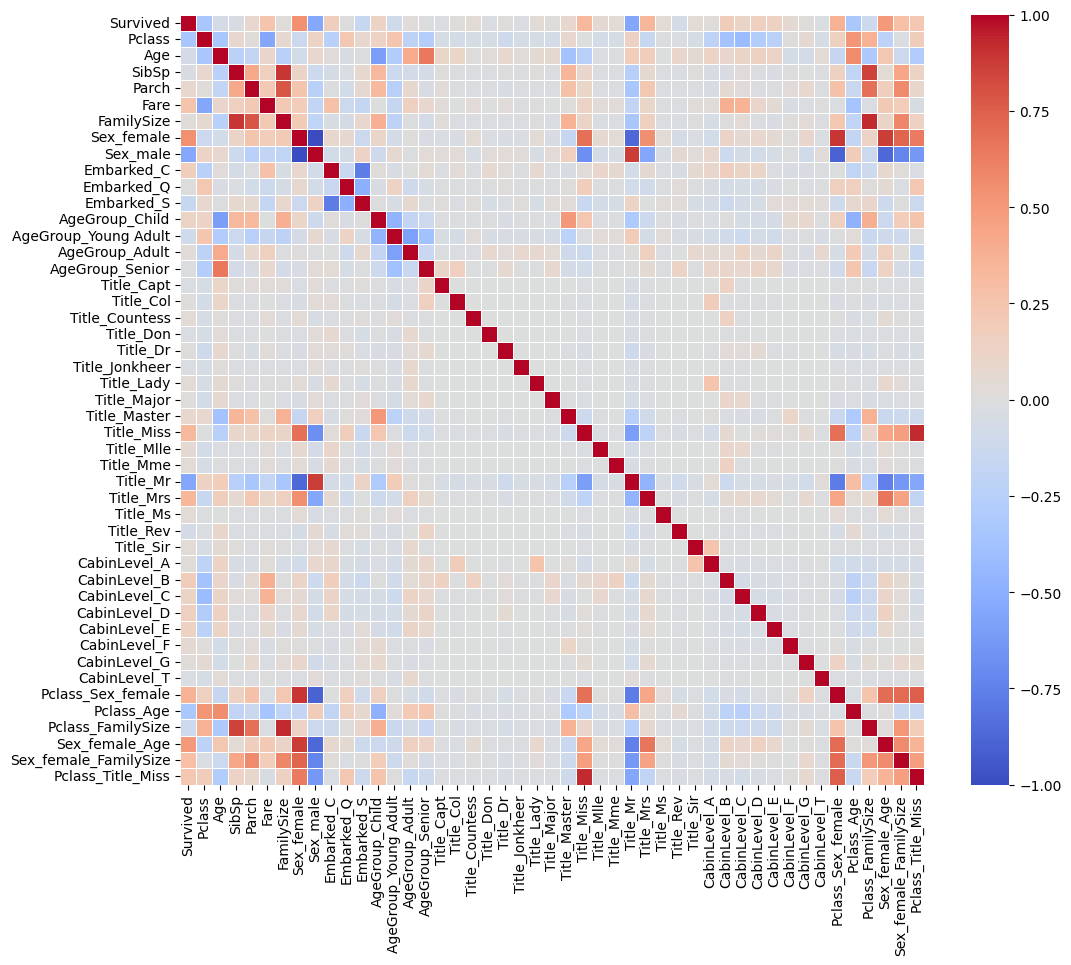

In [13]:
def plot_correlation(df):
    dff = df.drop(id_features, axis=1)
    # dff = one_hot_encode(dff, ['Embarked', 'Sex','AgeGroup'])

    
    corr = dff.select_dtypes('number').corr()
    
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    fig, axs = plt.subplots(figsize=(12,10))
    sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,annot=False, linewidth=0.5)
    plt.show()
plot_correlation(train_df)

In [14]:
train_df.select_dtypes('number').columns
formatted_train_df=train_df.drop(id_features,axis=1)
formatted_train_df=formatted_train_df.select_dtypes('number')
formatted_train_df = formatted_train_df.astype(int)
numerical_features=formatted_train_df.select_dtypes('number').columns
scaler = StandardScaler()
dff = pd.DataFrame()
dff[numerical_features] = scaler.fit_transform(formatted_train_df[numerical_features])
formatted_train_df.drop(numerical_features, axis=1).join(dff)
formatted_train_df.dropna(inplace=True)
formatted_train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,...,CabinLevel_E,CabinLevel_F,CabinLevel_G,CabinLevel_T,Pclass_Sex_female,Pclass_Age,Pclass_FamilySize,Sex_female_Age,Sex_female_FamilySize,Pclass_Title_Miss
0,0,3,22,1,0,7,2,0,1,0,...,0,0,0,0,0,66,6,0,0,0
1,1,1,38,1,0,71,2,1,0,1,...,0,0,0,0,1,38,2,38,2,0
2,1,3,26,0,0,7,1,1,0,0,...,0,0,0,0,3,78,3,26,1,3
3,1,1,35,1,0,53,2,1,0,0,...,0,0,0,0,1,35,2,35,2,0
4,0,3,35,0,0,8,1,0,1,0,...,0,0,0,0,0,105,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,0,1,0,...,0,0,0,0,0,54,2,0,0,0
887,1,1,19,0,0,30,1,1,0,0,...,0,0,0,0,1,19,1,19,1,1
888,0,3,28,1,2,23,4,1,0,0,...,0,0,0,0,3,84,12,28,4,3
889,1,1,26,0,0,30,1,0,1,1,...,0,0,0,0,0,26,1,0,0,0


In [15]:
# Assuming 'formatted_train_df' is your DataFrame
correlation_matrix = formatted_train_df.corr()

highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated features
formatted_train_df = formatted_train_df.drop(columns=highly_correlated)
test_df = test_df.drop(columns=highly_correlated)


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


y=formatted_train_df[target_feature]
x=formatted_train_df.drop(target_feature,axis=1)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2, random_state=1337,shuffle=True)

rf=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(x_train,y_train)
rfc_pred = rf.predict(x_val)
rfc_acc = accuracy_score(y_val, rfc_pred)
print(f"RF Classifier accuracy: {rfc_acc:.6f}")

RF Classifier accuracy: 0.843575


In [17]:
formatted_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Survived               891 non-null    int64
 1   Pclass                 891 non-null    int64
 2   Age                    891 non-null    int64
 3   SibSp                  891 non-null    int64
 4   Parch                  891 non-null    int64
 5   Fare                   891 non-null    int64
 6   Sex_female             891 non-null    int64
 7   Embarked_C             891 non-null    int64
 8   Embarked_Q             891 non-null    int64
 9   Embarked_S             891 non-null    int64
 10  AgeGroup_Child         891 non-null    int64
 11  AgeGroup_Young Adult   891 non-null    int64
 12  AgeGroup_Adult         891 non-null    int64
 13  AgeGroup_Senior        891 non-null    int64
 14  Title_Capt             891 non-null    int64
 15  Title_Col              891 non-null    i

In [18]:
X_test = pd.get_dummies(test_df.drop(id_features, axis=1))

# Drop duplicate columns if any
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Align feature names with those seen during training
X_test_aligned = X_test.reindex(columns=rf.feature_names_in_)
X_test_aligned.fillna(0,inplace=True)

# Make predictions
predictions = rf.predict(X_test_aligned)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [19]:
# Build a simple neural network model
import numpy as np
import tensorflow as tf
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)



model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model on the validation set
nn_pred_prob = model.predict(x_val)
nn_pred = (nn_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
nn_acc = accuracy_score(y_val, nn_pred)
print(f"Neural Network accuracy: {nn_acc:.6f}")

2024-01-10 15:48:58.667906: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 15:48:58.713456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 15:48:58.713498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 15:48:58.714744: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 15:48:58.720839: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 15:48:58.721467: I tensorflow/core/platform/cpu_feature_guard.cc:1

Epoch 1/10
23/23 [==============================] - 1s 11ms/step - loss: 2.8183 - accuracy: 0.5407 - val_loss: 1.0491 - val_accuracy: 0.6927
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.8752 - accuracy: 0.6868 - val_loss: 0.6394 - val_accuracy: 0.6816
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.7022 - val_loss: 0.5926 - val_accuracy: 0.7207
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.7177 - val_loss: 0.5549 - val_accuracy: 0.7430
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.7346 - val_loss: 0.5517 - val_accuracy: 0.7598
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7739 - val_loss: 0.5435 - val_accuracy: 0.7263
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7640 - val_loss: 0.5536 - val_accuracy: 0.7765
Epoch 8/10
23/23 [=

In [20]:
from sklearn.model_selection import GridSearchCV


y = formatted_train_df[target_feature]
X = formatted_train_df.drop(target_feature, axis=1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1337, shuffle=True)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and train the final model
best_params = grid_search.best_params_
rf_optimized = RandomForestClassifier(random_state=1, **best_params)
rf_optimized.fit(X_train, y_train)

# Make predictions on the validation set
rfc_pred = rf_optimized.predict(X_val)

# Calculate accuracy
rfc_acc = accuracy_score(y_val, rfc_pred)
print(f"Optimized RF Classifier accuracy: {rfc_acc:.6f}")
print("Best hyperparameters:", best_params)

Optimized RF Classifier accuracy: 0.821229
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [21]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm as lgb

lgbc = lgb.LGBMClassifier()
xgbc = xgb.XGBClassifier()
rfc = RandomForestClassifier(random_state=1,n_estimators=100)

# Fit data for each classifier
lgbc.fit(x_train, y_train)
xgbc.fit(x_train, y_train)
rfc.fit(x_train, y_train)
    
# Set up voting model for all the classifiers and fit
voters = [('lgbc', lgbc), ('xgbc', xgbc), ('rfc', rfc)]
vc = VotingClassifier(estimators=voters, voting='soft')
vc.fit(x_train, y_train)

# Predict
lgbc_pred = lgbc.predict(x_val)
xgbc_pred = xgbc.predict(x_val)
rfc_pred = rfc.predict(x_val)
vc_pred = vc.predict(x_val)

# Check prediction accuracy
lgbc_acc = accuracy_score(y_val, lgbc_pred)
xgbc_acc = accuracy_score(y_val, xgbc_pred)
rfc_acc = accuracy_score(y_val, rfc_pred)
vc_acc = accuracy_score(y_val, vc_pred)
print(f"LGB Classifier accuracy: {lgbc_acc:.6f}")
print(f"XGB Classifier accuracy: {xgbc_acc:.6f}")
print(f"RF Classifier accuracy: {rfc_acc:.6f}")
print(f"Voting Classifier accuracy: {vc_acc:.6f}")  

[LightGBM] [Info] Number of positive: 275, number of negative: 437
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.386236 -> initscore=-0.463162
[LightGBM] [Info] Start training from score -0.463162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf